In [ ]:
# Import necessary libraries
import pandas as pd
from gprofiler import GProfiler  # This should work after the correct installation
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(data.head())



       PMID                                 extracted_sentence     Label
0  31399034  However, the functions        of <piRNA>piRNAs...  Negative
1  31399034  In this review, we discuss current findings re...  positive
2  31399034  providing new        insights regarding the po...  positive
3  37407865  In this review, we systematically discuss the ...  positive
4  37407865  AKT pathway regulation, cardiac remodeling and...  positive


Dataset Loaded:
       PMID                                 extracted_sentence     Label
0  31399034  However, the functions        of <piRNA>piRNAs...  Negative
1  31399034  In this review, we discuss current findings re...  positive
2  31399034  providing new        insights regarding the po...  positive
3  37407865  In this review, we systematically discuss the ...  positive
4  37407865  AKT pathway regulation, cardiac remodeling and...  positive

PiRNA-Disease Association Summary:
                     piRNA                  disease  count
0                piR-52200          breast cancer        1
1                piR-52200      lung cancer disease      1
2          hsa_piR_011186                  leukemia      1
3              piR-016658            breast cancer       1
4               piR-28876            cancer disease      1
..                     ...                      ...    ...
288  piwi-interacting RNAs           cancer disease      3
289  piwi-interacting RNAs  coronary h

<ipython-input-21-e947f935176e>:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


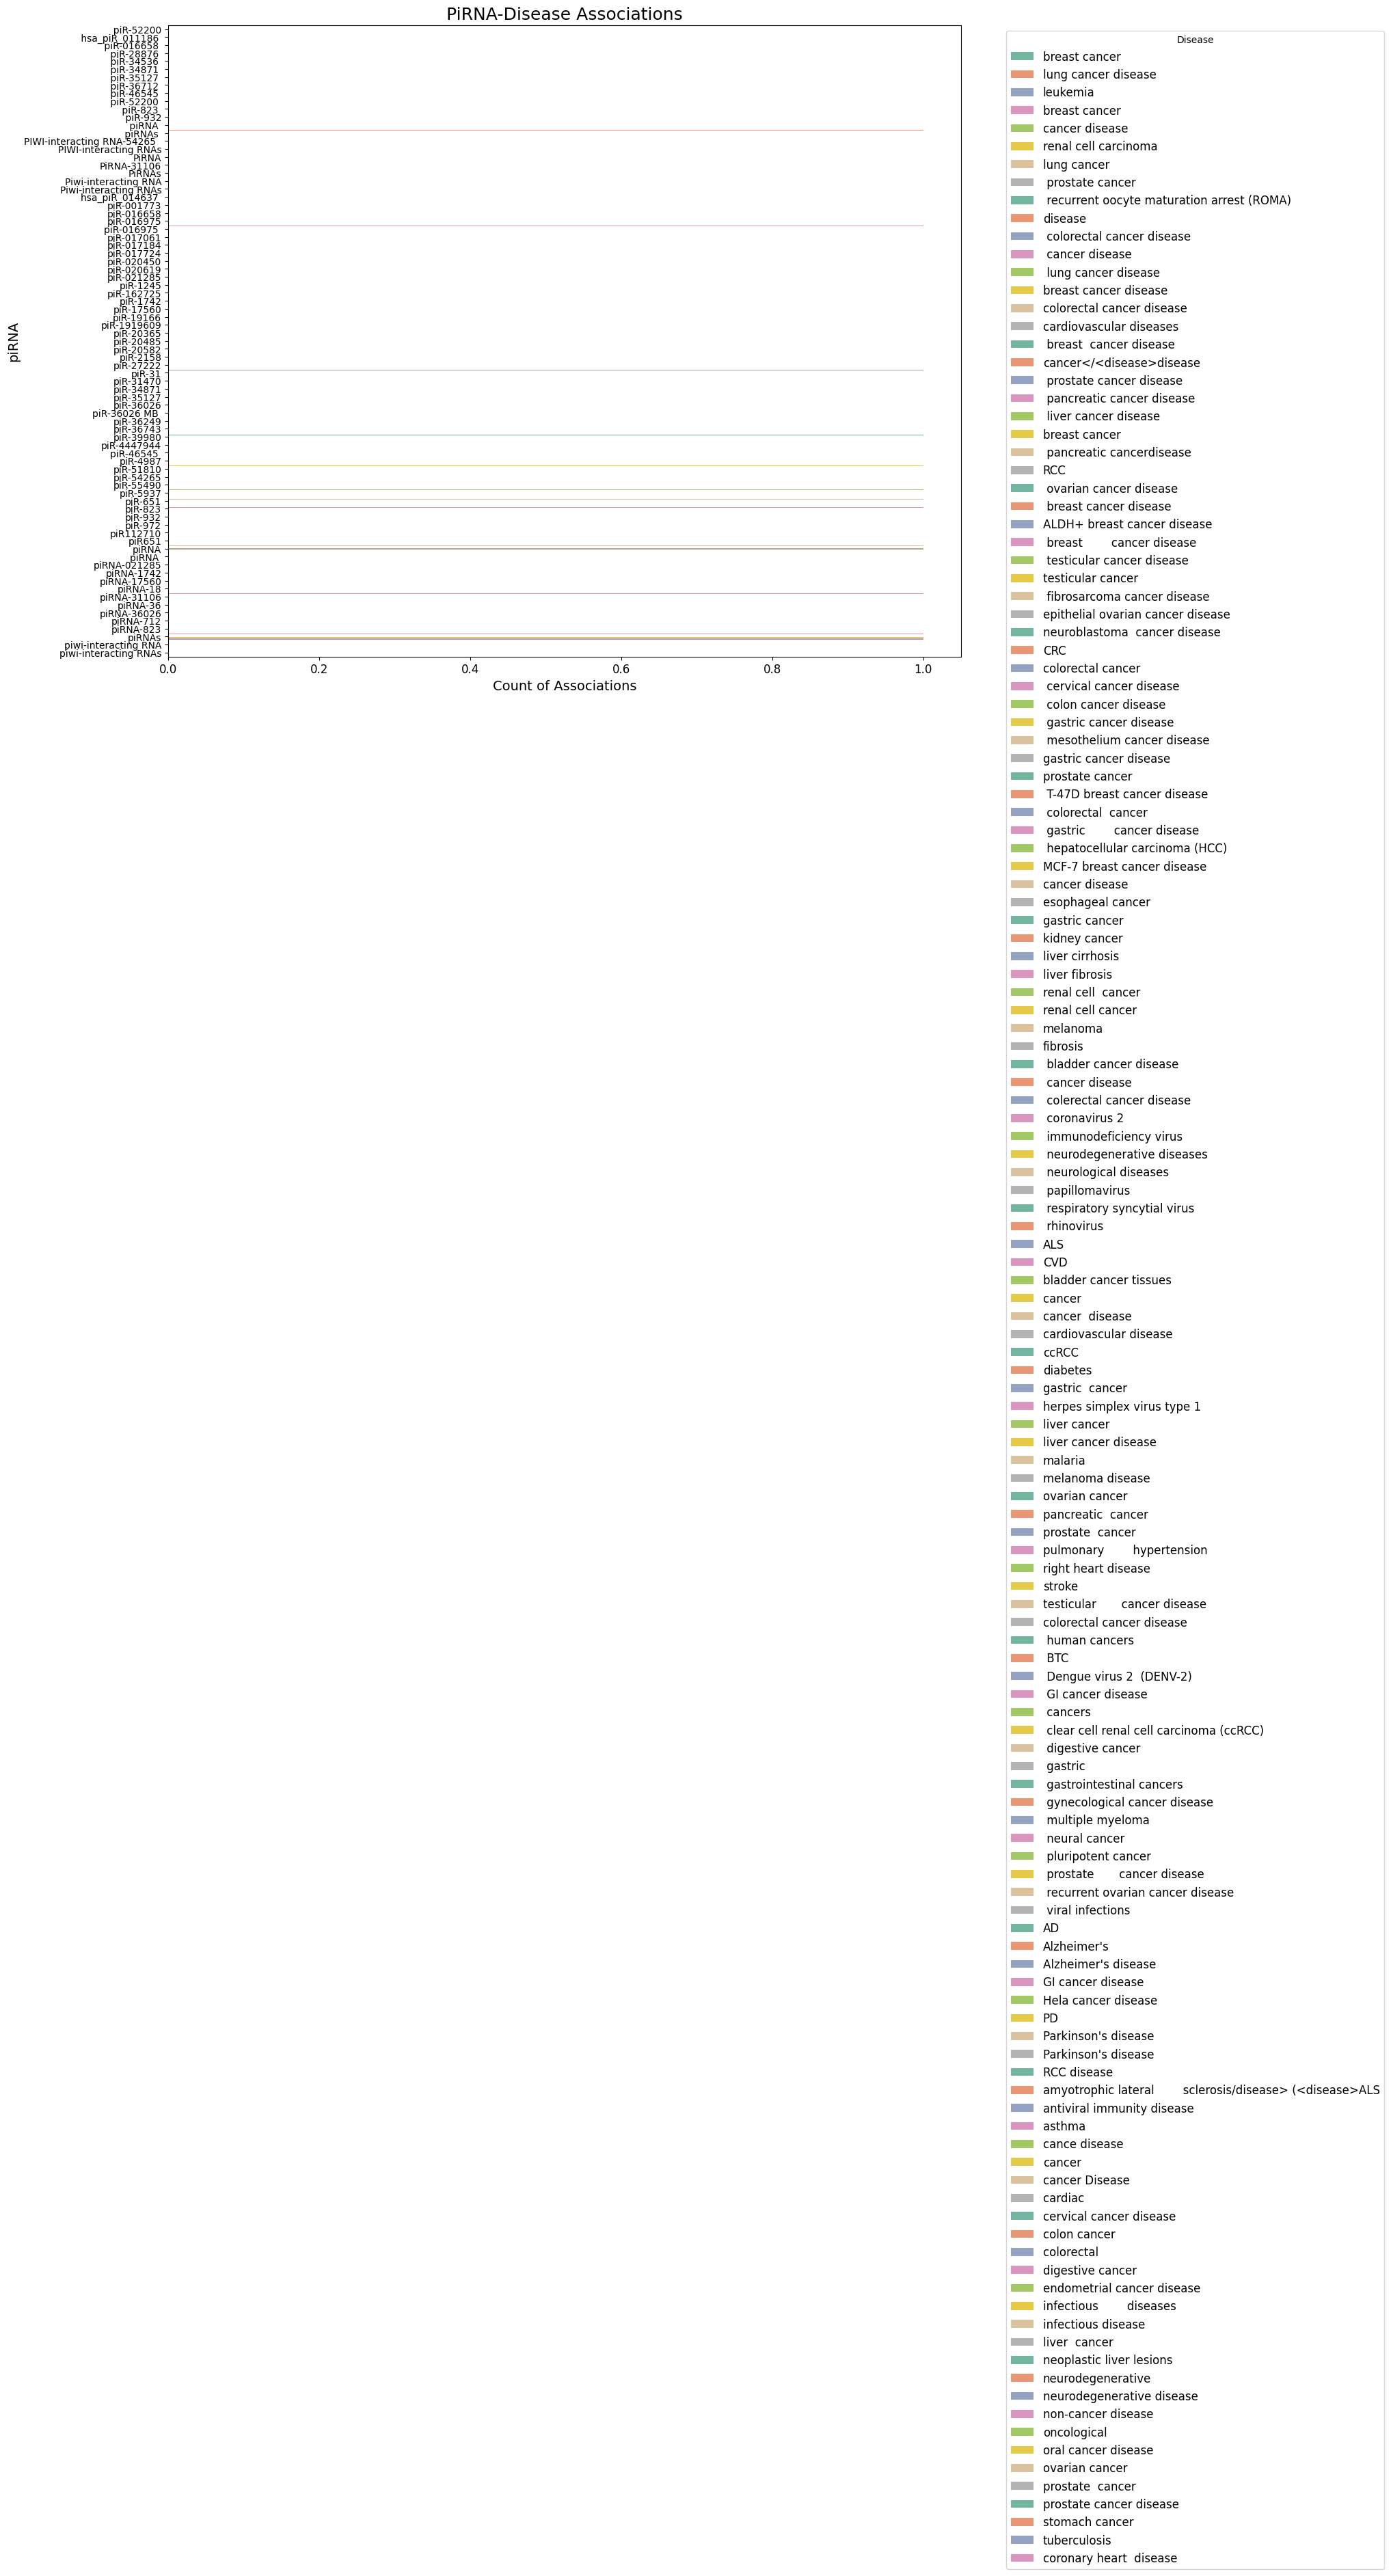


Unique Diseases for Enrichment Analysis:
['breast cancer  ' 'lung cancer disease' 'leukemia' 'breast cancer '
 'cancer disease' 'renal cell carcinoma' 'lung cancer '
 ' prostate cancer ' ' recurrent oocyte maturation arrest (ROMA) '
 'disease' ' colorectal cancer disease' ' cancer disease '
 ' lung cancer disease' 'breast cancer disease'
 'colorectal cancer disease' 'cardiovascular diseases'
 ' breast  cancer disease' 'cancer</<disease>disease'
 ' prostate cancer disease' ' pancreatic cancer disease'
 ' liver cancer disease' 'breast cancer' ' pancreatic cancerdisease' 'RCC'
 ' ovarian cancer disease' ' breast cancer disease'
 'ALDH+ breast cancer disease' ' breast        cancer disease'
 ' testicular cancer disease' 'testicular cancer '
 ' fibrosarcoma cancer disease' 'epithelial ovarian cancer disease'
 'neuroblastoma  cancer disease' 'CRC' 'colorectal cancer '
 ' cervical cancer disease' ' colon cancer disease'
 ' gastric cancer disease' ' mesothelium cancer disease'
 'gastric cance

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Load your dataset
# Replace 'data.csv' with the actual path to your CSV file
df = pd.read_csv('data.csv')

# Step 1: Ensure the data is loaded correctly
print("Dataset Loaded:")
print(df.head())

# Step 2: Extract piRNA and disease tags for positive labels
piRNA_disease_map = defaultdict(list)

for index, row in df.iterrows():
    if row['Label'] == 'positive':
        # Extract <piRNA> and <disease> using regex
        piRNAs = re.findall(r'<piRNA>(.*?)</piRNA>', row['extracted_sentence'])
        diseases = re.findall(r'<disease>(.*?)</disease>', row['extracted_sentence'])

        for piRNA in piRNAs:
            for disease in diseases:
                piRNA_disease_map[piRNA].append(disease)

# Step 3: Create a summary of associations
piRNA_disease_df = pd.DataFrame([(piRNA, disease) for piRNA, diseases in piRNA_disease_map.items() for disease in diseases],
                                 columns=['piRNA', 'disease'])

association_summary = piRNA_disease_df.groupby(['piRNA', 'disease']).size().reset_index(name='count')

# Display the summary
print("\nPiRNA-Disease Association Summary:")
print(association_summary)

# Step 4: Visualize the associations with horizontal bar graphs
plt.figure(figsize=(16, 12))  # Increase figure size for horizontal layout
sns.countplot(data=association_summary, y='piRNA', hue='disease', palette='Set2')  # Use 'y' for horizontal bars
plt.title('PiRNA-Disease Associations', fontsize=18)  # Increase title font size
plt.ylabel('piRNA', fontsize=14)  # Increase y-label font size
plt.xlabel('Count of Associations', fontsize=14)  # Increase x-label font size
plt.xticks(fontsize=12)  # Adjust x-tick labels
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Adjust legend font size
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust right space for legend
plt.show()

# Optional: Pathway enrichment analysis
unique_diseases = association_summary['disease'].unique()
print("\nUnique Diseases for Enrichment Analysis:")
print(unique_diseases)


In [ ]:
unique_diseases = set()

for index, row in df.iterrows():
    if row['Label'] == 'positive':
        diseases = re.findall(r'<disease>(.*?)</disease>', row['extracted_sentence'])
        unique_diseases.update(diseases)

# Convert to a list for GProfiler
unique_diseases = list(unique_diseases)
print("\nUnique Diseases for Enrichment Analysis:")
print(unique_diseases)

# Step 3: Perform enrichment analysis using GProfiler
gp = GProfiler(return_dataframe=True)
enrichment_results = gp.profile(organism='hsapiens', query=unique_diseases)

# Step 4: Check results and visualize
if not enrichment_results.empty:
    print("\nEnrichment Results:")
    print(enrichment_results[['source', 'name', 'p_value', 'q_value', 'description']])

    # Visualize the top enrichment results
    plt.figure(figsize=(12, 6))
    sns.barplot(data=enrichment_results.nlargest(10, 'q_value'), x='q_value', y='name', palette='viridis')
    plt.title('Top Enrichment Results')
    plt.xlabel('Adjusted p-value (q-value)')
    plt.ylabel('Pathway/Term')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()
else:
    print("No enrichment results returned.")


Unique Diseases for Enrichment Analysis:
['cancer ', 'MCF-7 breast cancer disease', 'neurodegenerative disease', 'oncological', 'colorectal cancer disease', 'infectious        diseases', 'RCC', 'pulmonary        hypertension', ' prostate cancer disease', ' coronavirus 2 ', 'lung cancer disease', ' cervical cancer disease', 'CRC', 'leukemia', 'gastric cancer ', ' mesothelium cancer disease', 'prostate cancer ', ' BTC ', 'prostate cancer disease', 'renal cell  cancer', 'kidney cancer ', 'CVD', 'ccRCC', 'colon cancer ', 'gastric cancer disease', 'cardiac  ', 'oral cancer disease', 'renal cell carcinoma', 'amyotrophic lateral        sclerosis/disease> (<disease>ALS', 'breast cancer ', 'colorectal cancer disease ', 'ALDH+ breast cancer disease', 'herpes simplex virus type 1', ' pluripotent cancer ', ' hepatocellular carcinoma (HCC) ', ' colerectal cancer disease', ' Dengue virus 2  (DENV-2) ', "Parkinson's disease ", "Alzheimer's", 'cancer disease ', ' neurodegenerative diseases ', 'corona

In [ ]:
!pip install pandas gprofiler matplotlib seaborn


In [ ]:
!pip install gprofiler-official


In [ ]:
def clean_disease_names(diseases):
    cleaned_diseases = []
    for disease in diseases:
        # Remove leading/trailing spaces and fix common naming issues
        disease = disease.strip().lower().replace(" disease", "").replace("cancer", "cancer")
        disease = re.sub(r'\s+', ' ', disease)  # Replace multiple spaces with a single space
        cleaned_diseases.append(disease)
    return list(set(cleaned_diseases))  # Return unique cleaned disease names

# Clean the unique diseases
unique_diseases_cleaned = clean_disease_names(unique_diseases)
print("\nCleaned Unique Diseases:")
print(unique_diseases_cleaned)



Cleaned Unique Diseases:
['clear cell renal cell carcinoma (ccrcc)', 'cancer ', 'viral infections', 'multiple myeloma', 'oncological', 'infectious s', 'human cancers', 'pluripotent cancer', 'stomach cancer', 'fibrosarcoma cancer', 'ad', 'mesothelium cancer', 'gastrointestinal cancers', 'testicular cancer', 'prostate cancer', 'ccrcc', 'cvd', 'leukemia', 'infectious', 'oral cancer', 'dengue virus 2 (denv-2)', 'mcf-7 breast cancer', 'recurrent oocyte maturation arrest (roma)', 'pd', 'rhinovirus', 'neuroblastoma cancer', 'renal cell carcinoma', 'neurodegeneratives', 'amyotrophic lateral sclerosis/disease> (<disease>als', 'neurologicals', 'hela cancer', 'herpes simplex virus type 1', 'pulmonary hypertension', 'gynecological cancer', 'colorectal', 'cancers', 'renal cell cancer', 'non-cancer', 'kidney cancer', 'liver cancer', 'asthma', 'als', 'neural cancer', 'melanoma', 'coronavirus 2', 'respiratory syncytial virus', 'coronary heart ', 'breast cancer', 'endometrial cancer', 'recurrent ovari

In [ ]:
!pip install transformers datasets torch


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
